In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('wolf.jpg')

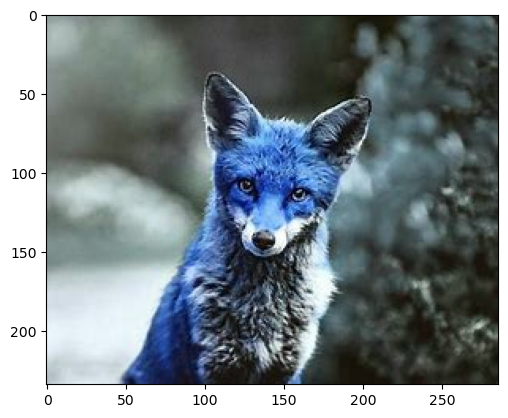

In [3]:
plt.imshow(img)
plt.show()

In [4]:
# Convert from BGR to RGB for proper color display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

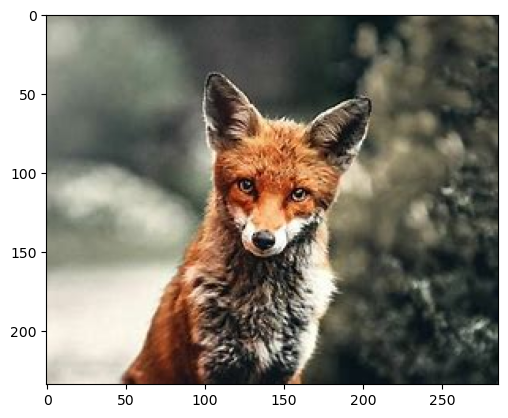

In [5]:
# Display the image
plt.imshow(img_rgb)
plt.show()

In [6]:
bright_image = cv2.convertScaleAbs(img_rgb, alpha=1, beta=50)  # beta is the brightness factor

# Decrease brightness
dark_image = cv2.convertScaleAbs(img_rgb, alpha=1, beta=-50)

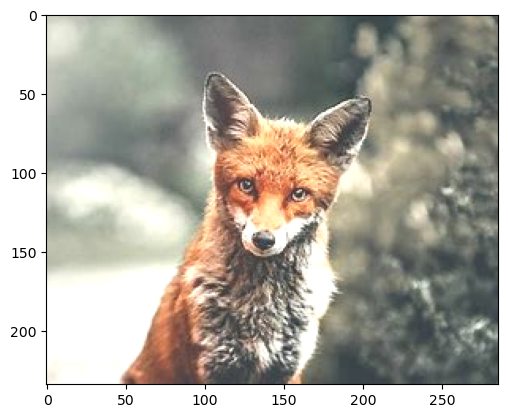

In [7]:
plt.imshow(bright_image)

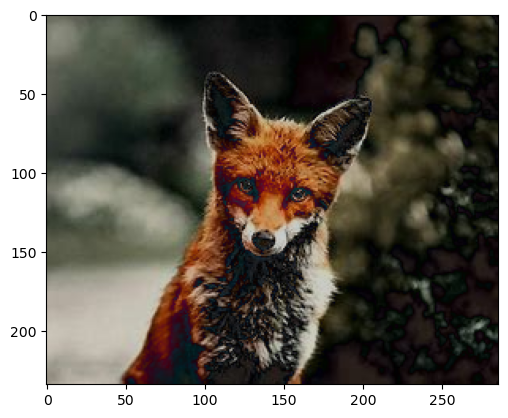

In [8]:
plt.imshow(dark_image)

In [9]:
linear_contrast = cv2.convertScaleAbs(img_rgb, alpha=2.0, beta=0)

In [10]:
gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hist_eq = cv2.equalizeHist(gray_image)

In [11]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
adaptive_hist_eq = clahe.apply(gray_image)

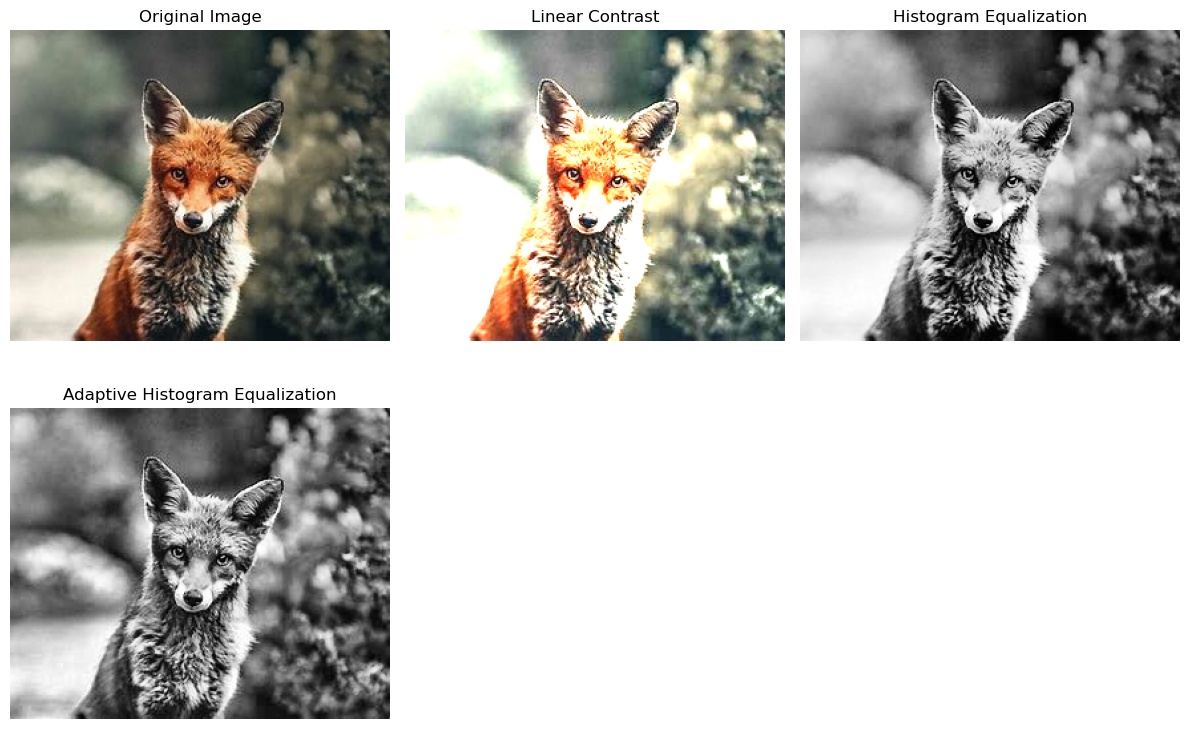

In [12]:
plt.figure(figsize=(12, 8))

# Plot Original Image
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Plot Linear Contrast Adjustment
plt.subplot(2, 3, 2)
plt.imshow(linear_contrast)
plt.title("Linear Contrast")
plt.axis("off")

# Plot Histogram Equalization
plt.subplot(2, 3, 3)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")

# Plot Adaptive Histogram Equalization
plt.subplot(2, 3, 4)
plt.imshow(adaptive_hist_eq, cmap='gray')
plt.title("Adaptive Histogram Equalization")
plt.axis("off")

plt.tight_layout()
plt.show()

In [13]:
gaussian_blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)

In [14]:
box_blur = cv2.blur(img_rgb, (5, 5))

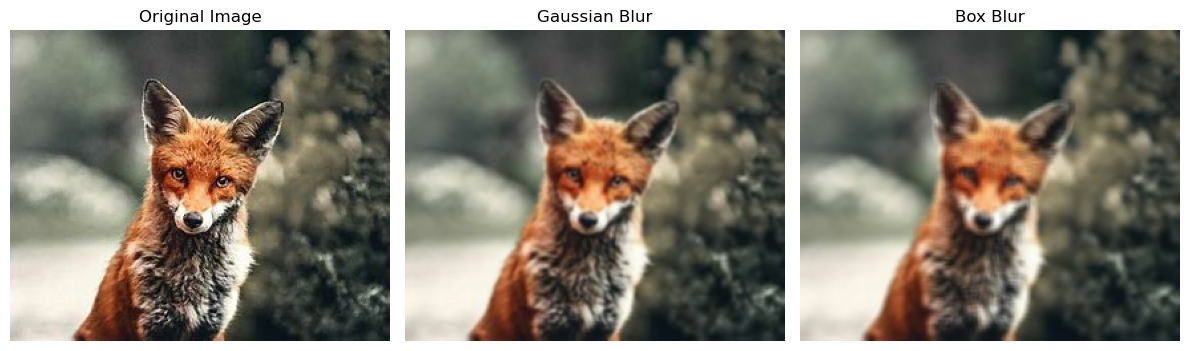

In [15]:
plt.figure(figsize=(12, 8))

# Plot Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Plot Gaussian Blur
plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur)
plt.title("Gaussian Blur")
plt.axis("off")

# Plot Box Blur
plt.subplot(1, 3, 3)
plt.imshow(box_blur)
plt.title("Box Blur")
plt.axis("off")

plt.tight_layout()
plt.show()

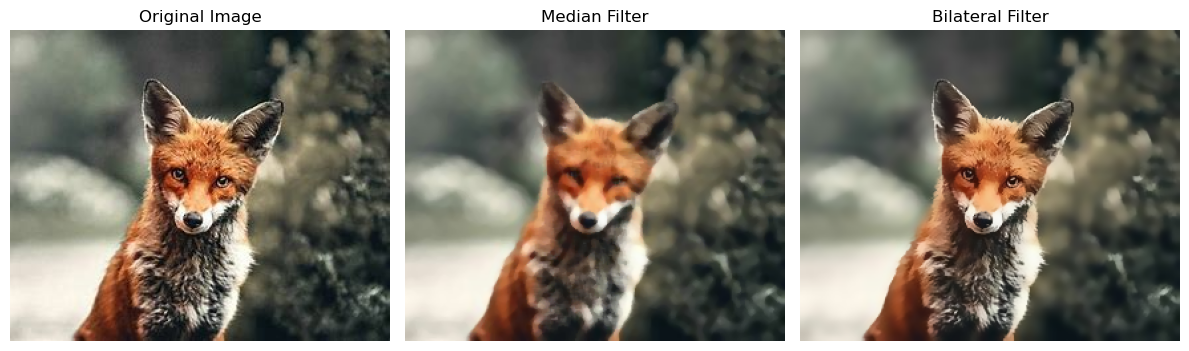

In [16]:
median_filtered = cv2.medianBlur(img_rgb, 5)  # Kernel size should be odd

# 3. Bilateral Filter
# Smooths noise while preserving edges
bilateral_filtered = cv2.bilateralFilter(img_rgb, d=9, sigmaColor=75, sigmaSpace=75)

# 4. Display and Compare Results
plt.figure(figsize=(12, 8))

# Plot Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Plot Median Filtered Image
plt.subplot(1, 3, 2)
plt.imshow(median_filtered)
plt.title("Median Filter")
plt.axis("off")

# Plot Bilateral Filtered Image
plt.subplot(1, 3, 3)
plt.imshow(bilateral_filtered)
plt.title("Bilateral Filter")
plt.axis("off")

plt.tight_layout()
plt.show()

In [17]:
# Apply Sobel filters to calculate gradients in the x and y directions
sobel_x = cv2.Sobel(img_rgb, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(img_rgb, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

In [18]:
type(sobel_x)

numpy.ndarray

In [19]:
sobel_x.shape

(234, 286, 3)

In [20]:
sobel_x.max()

868.0

In [21]:
sobel_x.min()

-858.0

In [22]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [23]:
gradient_magnitude.shape

(234, 286, 3)

In [24]:
gradient_magnitude.max()

987.664922936924

In [25]:
gradient_magnitude.min()

0.0

In [26]:
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

In [27]:
print(sobel_x_display.max())
print(sobel_x_display.min())
print(sobel_x_display.shape)

254
0
(234, 286, 3)


In [28]:
print(gradient_magnitude_display.max())
print(gradient_magnitude_display.min())
print(gradient_magnitude_display.shape)

255
0
(234, 286, 3)


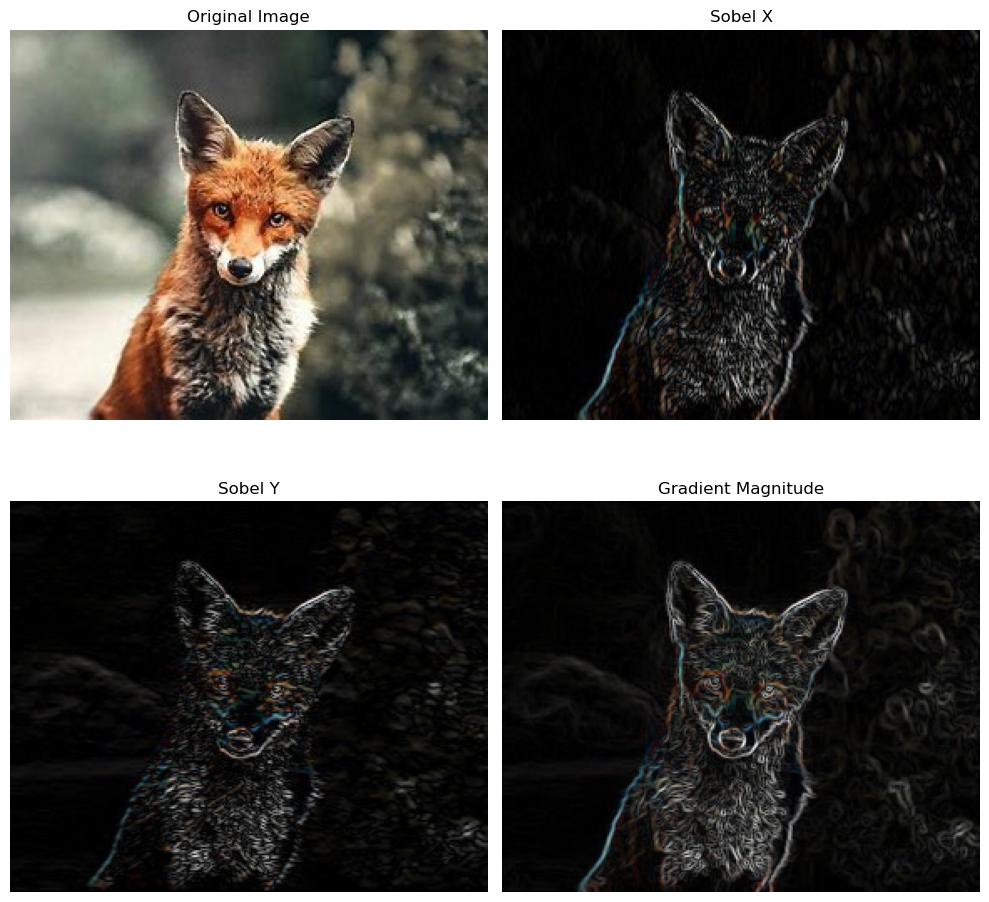

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

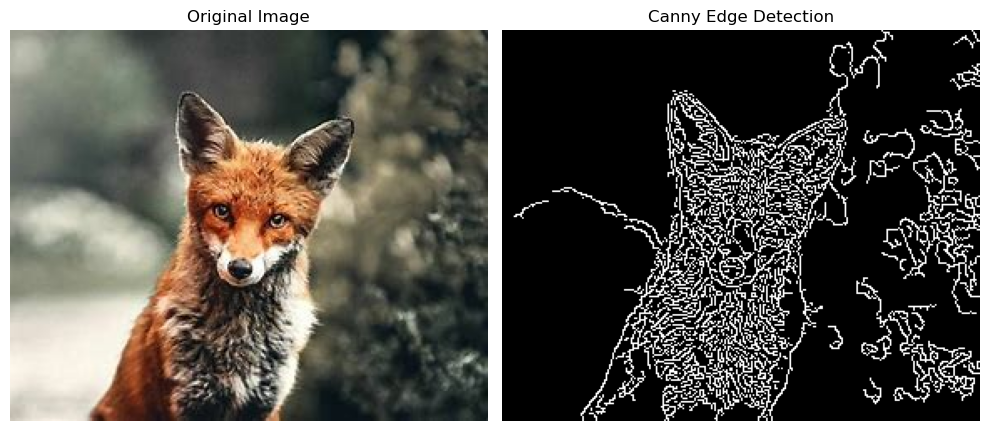

In [30]:
gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


low_threshold = 50  
high_threshold = 150  
canny_edges = cv2.Canny(gray_image, low_threshold, high_threshold)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

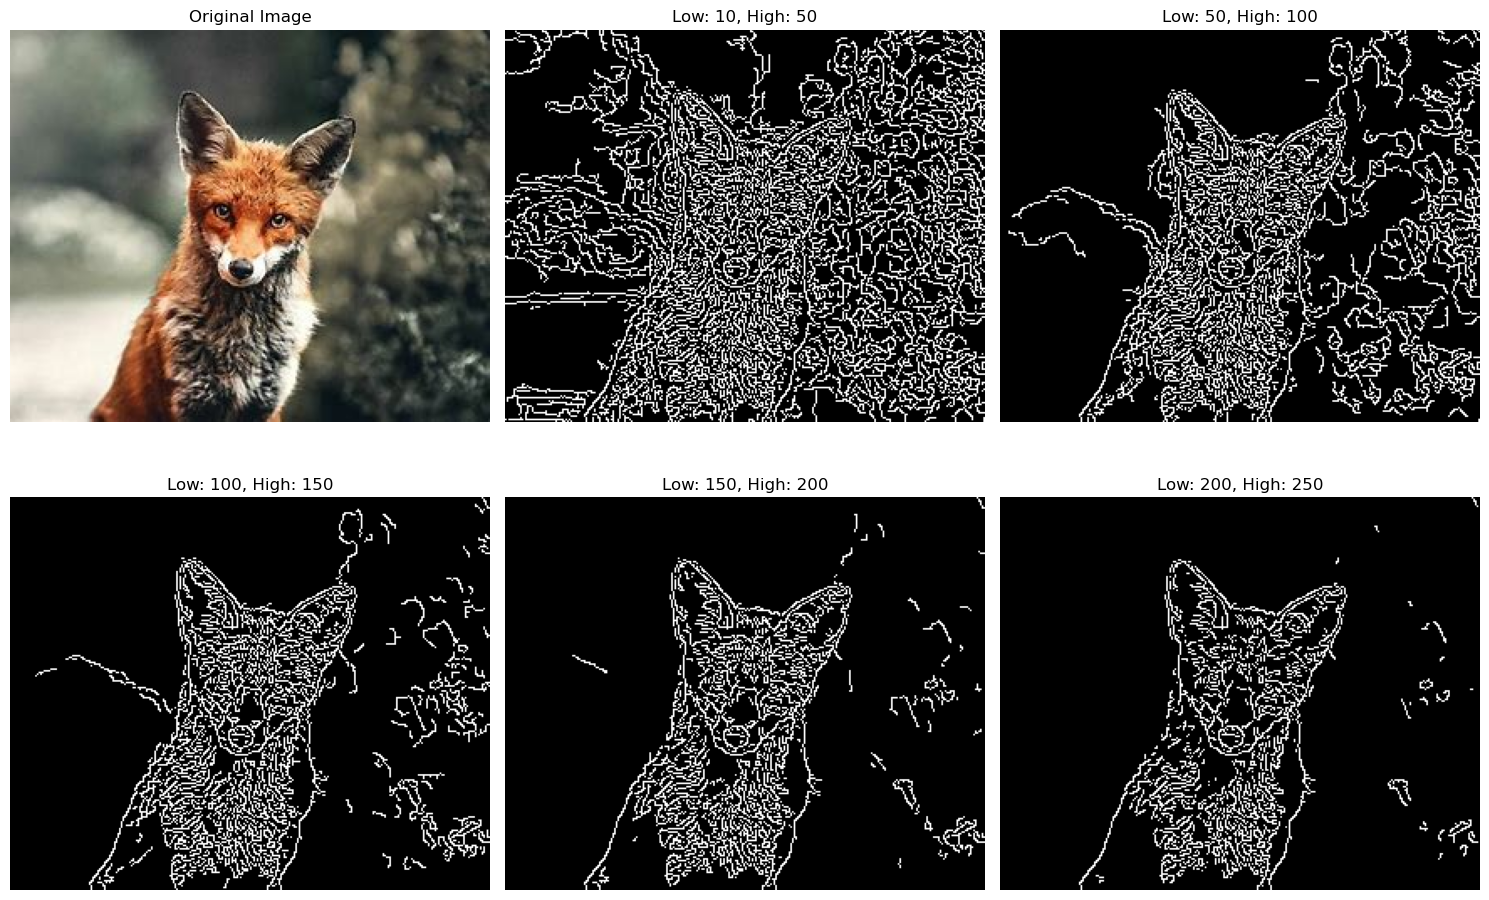

In [31]:
threshold_experiments = [
    (10, 50),   
    (50, 100),  
    (100, 150), 
    (150, 200), 
    (200, 250), 
]


results = []
for low_threshold, high_threshold in threshold_experiments:
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)
    results.append((f"Low: {low_threshold}, High: {high_threshold}", edges))


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


for i, (label, edges) in enumerate(results):
    plt.subplot(2, 3, i + 2)
    plt.imshow(edges, cmap='gray')
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()

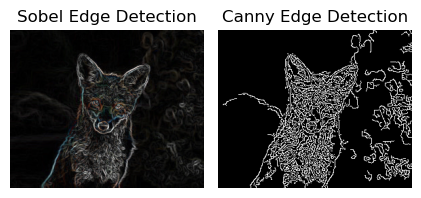

In [32]:
plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

# Canny Edge Detection
plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

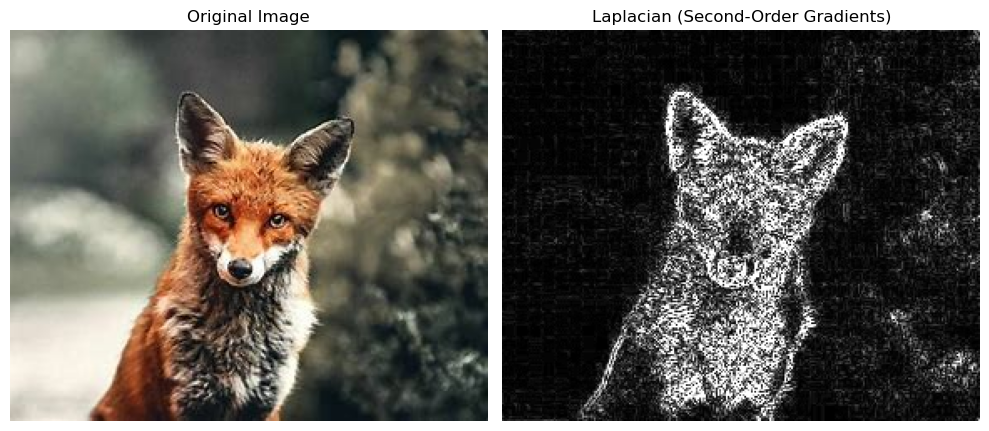

In [33]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F, ksize=3)

# Convert the result to an 8-bit image
laplacian_8bit = cv2.convertScaleAbs(laplacian)

# Display the original and processed images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Laplacian result
plt.subplot(1, 2, 2)
plt.imshow(laplacian_8bit, cmap='gray')
plt.title("Laplacian (Second-Order Gradients)")
plt.axis("off")

plt.tight_layout()
plt.show()

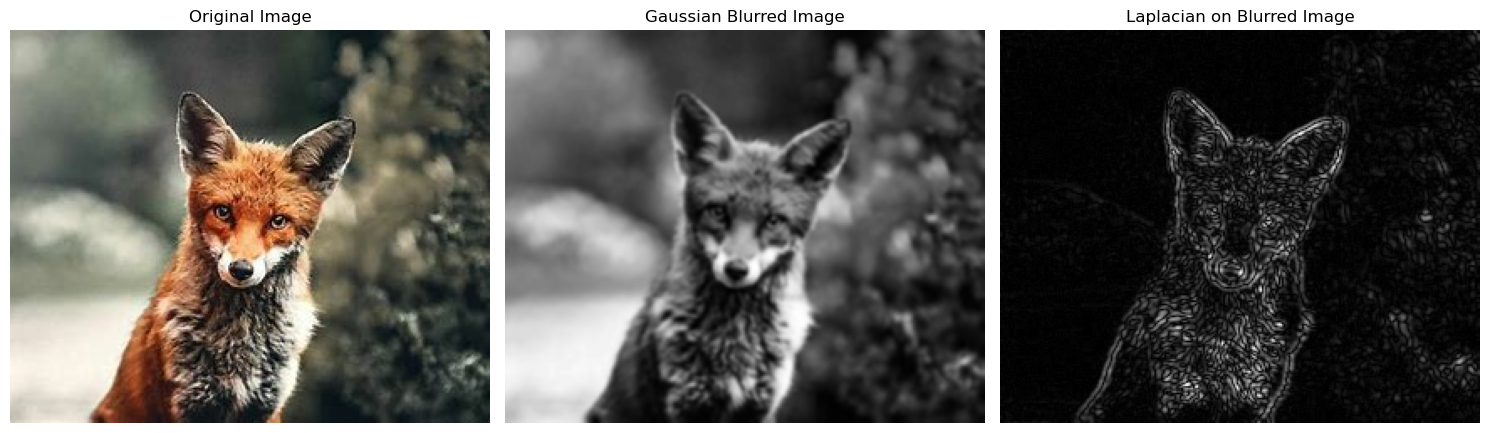

In [34]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)


laplacian_8bit = cv2.convertScaleAbs(laplacian)


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(laplacian_8bit, cmap='gray')
plt.title("Laplacian on Blurred Image")
plt.axis("off")

plt.tight_layout()
plt.show()

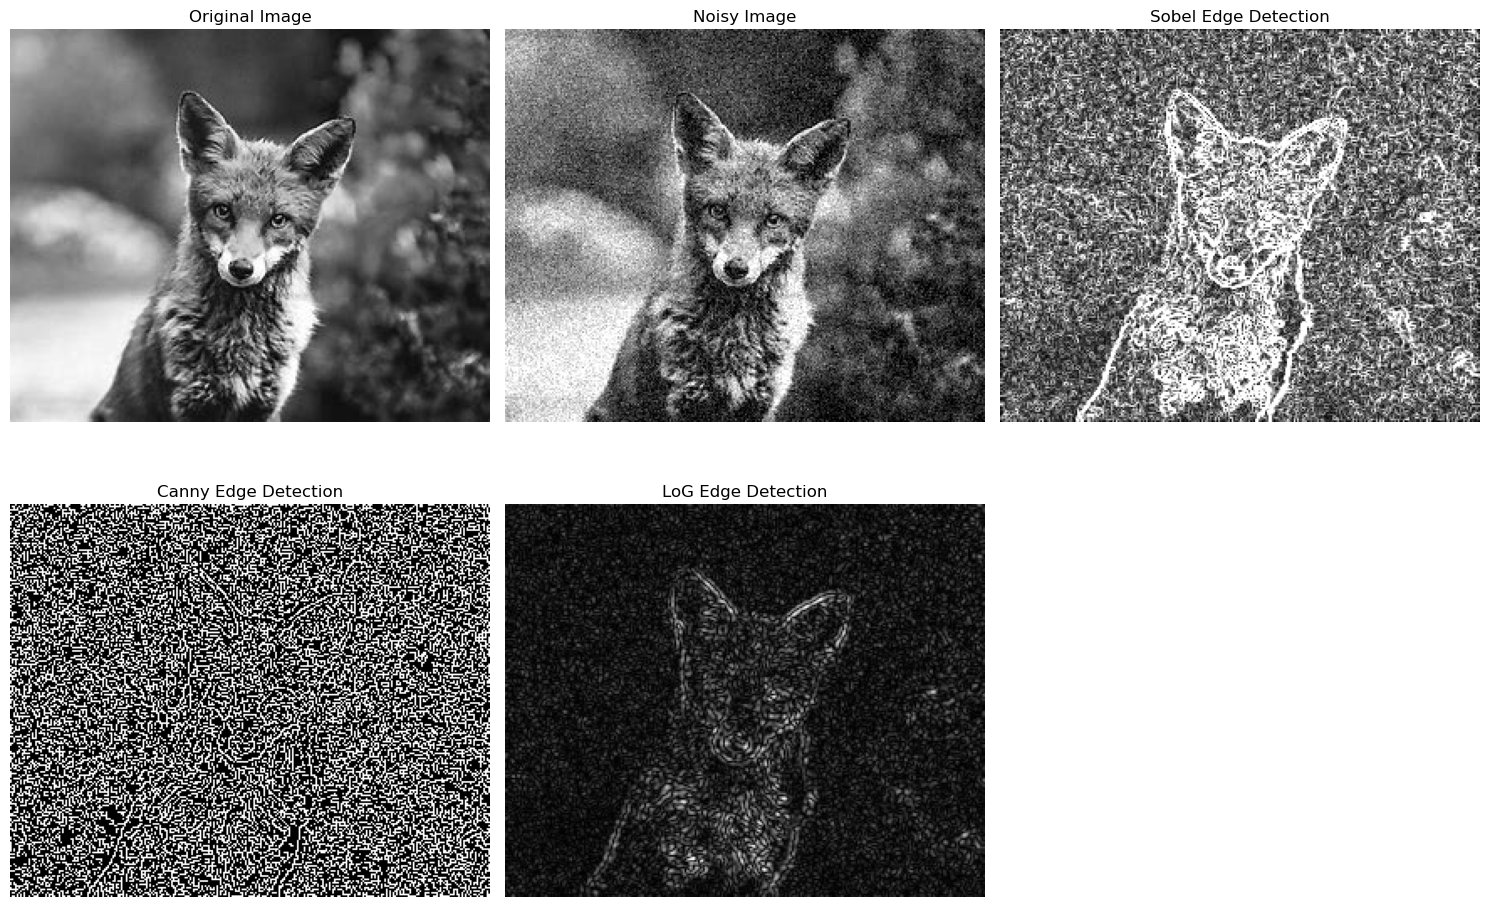

In [36]:
image = cv2.imread('wolf.jpg', cv2.IMREAD_GRAYSCALE)


def add_random_noise(image, noise_level=25):
    noise = np.random.normal(0, noise_level, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), noise)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image


noisy_image = add_random_noise(image, noise_level=25)

sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

canny_edges = cv2.Canny(noisy_image, 50, 150)


blurred = cv2.GaussianBlur(noisy_image, (5, 5), 0)
log_edges = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)

sobel_edges_8bit = cv2.convertScaleAbs(sobel_edges)
log_edges_8bit = cv2.convertScaleAbs(log_edges)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(sobel_edges_8bit, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

# LoG Edges
plt.subplot(2, 3, 5)
plt.imshow(log_edges_8bit, cmap='gray')
plt.title("LoG Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()